In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [42]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\data science\3. Multi Linear Regression\Toyota_Corolla.csv",encoding='latin-1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [43]:
df = df[['Price','Age_08_04','KM','Fuel_Type','HP','Met_Color',
         'Automatic','cc','Doors','Gears','Quarterly_Tax',
         'Weight','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period',
         'ABS','Airbag_1','Airbag_2','Airco','Automatic_airco',
         'Boardcomputer','CD_Player','Central_Lock','Powered_Windows',
         'Power_Steering','Radio','Mistlamps','Sport_Model',
         'Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar']]


In [44]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             1436 non-null   int64 
 1   Age_08_04         1436 non-null   int64 
 2   KM                1436 non-null   int64 
 3   Fuel_Type         1436 non-null   object
 4   HP                1436 non-null   int64 
 5   Met_Color         1436 non-null   int64 
 6   Automatic         1436 non-null   int64 
 7   cc                1436 non-null   int64 
 8   Doors             1436 non-null   int64 
 9   Gears             1436 non-null   int64 
 10  Quarterly_Tax     1436 non-null   int64 
 11  Weight            1436 non-null   int64 
 12  Mfr_Guarantee     1436 non-null   int64 
 13  BOVAG_Guarantee   1436 non-null   int64 
 14  Guarantee_Period  1436 non-null   int64 
 15  ABS               1436 non-null   int64 
 16  Airbag_1          1436 non-null   int64 
 17  Airbag_2      

Price               0
Age_08_04           0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

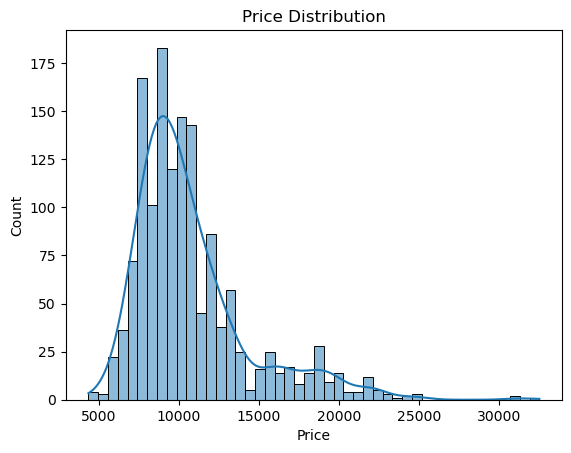

In [45]:
# Price distribution
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()


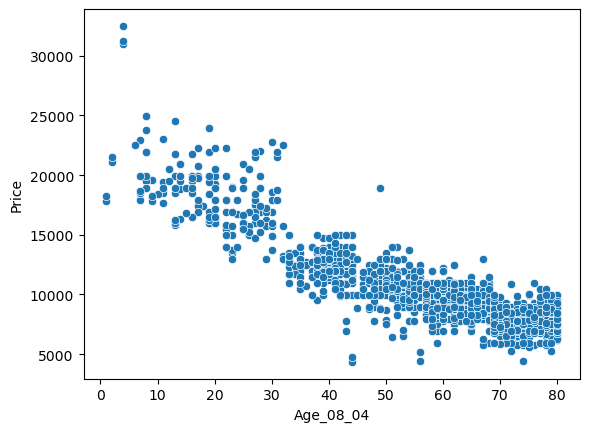

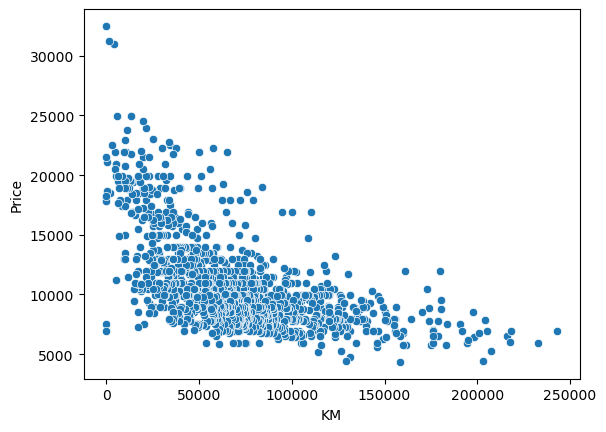

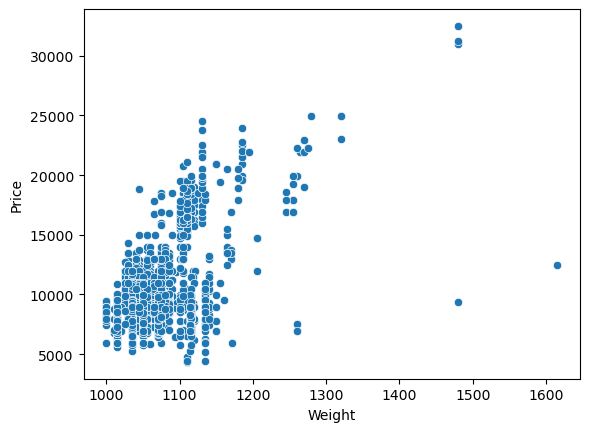

In [46]:
sns.scatterplot(x='Age_08_04', y='Price', data=df)
plt.show()

sns.scatterplot(x='KM', y='Price', data=df)
plt.show()

sns.scatterplot(x='Weight', y='Price', data=df)
plt.show()


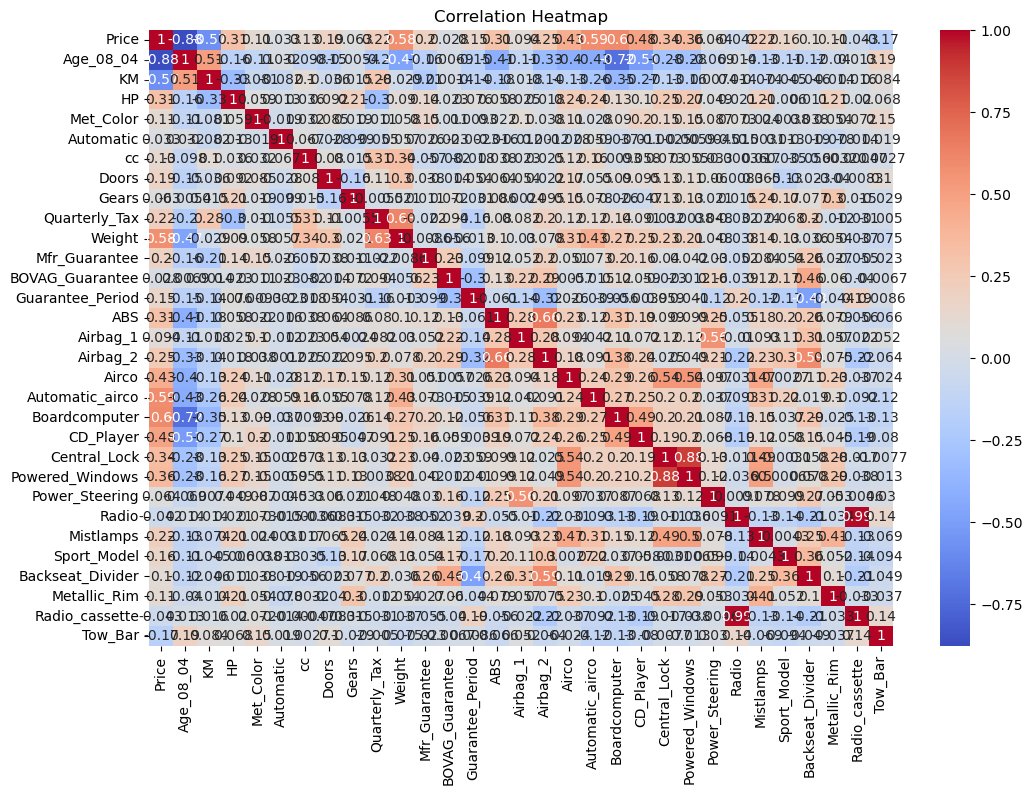

In [47]:
# Correlation heatmap
numeric_df = df.select_dtypes(include='number')
numeric_df = numeric_df.dropna()

corr = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [48]:
# categorical variables
df = pd.get_dummies(df, drop_first=True)
df.head()


,Price,Age_08_04,KM,HP,Met_Color,Automatic,cc,Doors,Gears,Quarterly_Tax,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,1,0,2000,3,5,210,...,1,0,0,0,1,0,0,0,True,False
1,13750,23,72937,90,1,0,2000,3,5,210,...,1,0,0,0,1,0,0,0,True,False
2,13950,24,41711,90,1,0,2000,3,5,210,...,1,0,0,0,1,0,0,0,True,False
3,14950,26,48000,90,0,0,2000,3,5,210,...,1,0,0,0,1,0,0,0,True,False
4,13750,30,38500,90,0,0,2000,3,5,210,...,1,0,1,0,1,0,0,0,True,False


In [49]:
# Train-Test Split
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [50]:
# Linear regression model
model1 = LinearRegression()
model1.fit(X_train, y_train)

pred1 = model1.predict(X_test)
r2_1 = r2_score(y_test, pred1)

r2_1


0.8822667145875319

In [51]:
# Log Transformation model for price 
y_log = np.log(df['Price'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X_train, y_train)

pred2 = model2.predict(X_test)
r2_2 = r2_score(y_test, pred2)

r2_2


0.8725195593116272

In [52]:
# R2 comparision
r2_table = pd.DataFrame({
    'Model': ['Linear Regression', 'Log Transformed Model'],
    'R2 Score': [r2_1, r2_2]
})

r2_table

,Model,R2 Score
0,Linear Regression,0.882267
1,Log Transformed Model,0.872520


In [53]:
# Final model prediction
final_model = model2  # if log model performs better


In [54]:
# Predict new Car prices
new_data = X.sample(3, random_state=1)

predicted_log_price = final_model.predict(new_data)
predicted_price = np.exp(predicted_log_price)

output = new_data.copy()
output['Predicted_Price'] = predicted_price

output.to_csv("car_price_predictions.csv", index=False)


# Conclusions
The car price prediction model was developed using multiple numerical and categorical features. 
Exploratory Data Analysis revealed strong relationships between price and age, kilometers driven, weight, and horsepower.
Multiple linear regression models were tested, including log transformation on the target variable.
The transformed model showed improved R² performance, indicating better prediction accuracy. 
The final model can reliably estimate car prices based on vehicle attributes.